# A simple numerical example of PCA:

In [7]:
import numpy as np
from numpy.linalg import svd
np.set_printoptions(precision=2)

## Step 0: Generating a sample matrix

In [20]:
X = np.array([[1, 1, 1, 0, 0], 
              [2, 2, 2, 0, 0], 
              [1, 1, 1, 0, 0], 
              [5, 5, 5, 0, 0], 
              [1, 1, 0, 2, 2], 
              [0, 0, 0, 3, 3], 
              [0, 0, 0, 1, 1]], dtype=np.float32)


## Step1: Zero-centering data

In [32]:
mu = np.mean(X, 0)
X_norm = X - mu
print('mu = ', mu)
print('X_norm =')
print(X_norm)

mu =  [0.00e+00 3.04e-01 5.20e+00 1.18e+01 1.18e+01 5.78e+00 1.36e+00 1.30e-01
 5.56e-03 1.99e+00 1.04e+01 1.20e+01 1.03e+01 8.18e+00 1.85e+00 1.08e-01
 2.78e-03 2.60e+00 9.90e+00 6.99e+00 7.10e+00 7.81e+00 1.79e+00 5.01e-02
 1.11e-03 2.47e+00 9.09e+00 8.82e+00 9.93e+00 7.55e+00 2.32e+00 2.23e-03
 0.00e+00 2.34e+00 7.67e+00 9.07e+00 1.03e+01 8.74e+00 2.91e+00 0.00e+00
 8.90e-03 1.58e+00 6.88e+00 7.23e+00 7.67e+00 8.24e+00 3.46e+00 2.73e-02
 7.23e-03 7.05e-01 7.51e+00 9.54e+00 9.42e+00 8.76e+00 3.73e+00 2.06e-01
 5.56e-04 2.79e-01 5.56e+00 1.21e+01 1.18e+01 6.76e+00 2.07e+00 3.64e-01]
X_norm =
[[ 0.   -0.3  -0.2  ... -6.76 -2.07 -0.36]
 [ 0.   -0.3  -5.2  ...  3.24 -2.07 -0.36]
 [ 0.   -0.3  -5.2  ...  9.24  6.93 -0.36]
 ...
 [ 0.   -0.3  -4.2  ... -0.76 -2.07 -0.36]
 [ 0.   -0.3  -3.2  ...  5.24 -2.07 -0.36]
 [ 0.   -0.3   4.8  ...  5.24 -1.07 -0.36]]


## Step2: computing sigma (covariance matrix)

In [42]:
m = X_norm.shape[0]
sigma = (X_norm.T @ X_norm) / m
print('sigma =')
print(sigma)

sigma =
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.82  2.4  ... -0.16  0.1  -0.07]
 [ 0.    2.4  22.6  ... -1.15  1.41  0.73]
 ...
 [ 0.   -0.16 -1.15 ... 34.8  15.64  2.87]
 [ 0.    0.1   1.41 ... 15.64 16.72  4.72]
 [ 0.   -0.07  0.73 ...  2.87  4.72  3.46]]


## Step3: computing SVD

In [43]:
U, S, V = svd(sigma)
print ('U : ')
print (U)
print ('S : ')
print (S)

U : 
[[ 0.00e+00  0.00e+00  0.00e+00 ...  1.00e+00  0.00e+00  0.00e+00]
 [-1.73e-02 -1.01e-02  1.83e-02 ...  0.00e+00 -1.09e-16  2.50e-16]
 [-2.23e-01 -4.91e-02  1.26e-01 ...  0.00e+00  1.26e-16  5.05e-17]
 ...
 [-8.94e-02  1.77e-01  2.32e-01 ...  0.00e+00 -5.24e-17 -1.88e-16]
 [-3.66e-02  1.95e-02  1.67e-01 ...  0.00e+00  2.68e-17  7.82e-17]
 [-1.15e-02 -6.70e-03  3.48e-02 ...  0.00e+00  6.30e-17 -2.22e-16]]
S : 
[1.79e+02 1.64e+02 1.42e+02 1.01e+02 6.95e+01 5.91e+01 5.19e+01 4.40e+01
 4.03e+01 3.70e+01 2.85e+01 2.73e+01 2.19e+01 2.13e+01 1.76e+01 1.69e+01
 1.58e+01 1.50e+01 1.22e+01 1.09e+01 1.07e+01 9.58e+00 9.22e+00 8.69e+00
 8.36e+00 7.16e+00 6.92e+00 6.19e+00 5.88e+00 5.15e+00 4.49e+00 4.24e+00
 4.05e+00 3.94e+00 3.70e+00 3.53e+00 3.08e+00 2.74e+00 2.67e+00 2.54e+00
 2.28e+00 1.91e+00 1.82e+00 1.69e+00 1.40e+00 1.29e+00 1.16e+00 9.31e-01
 6.69e-01 4.86e-01 2.52e-01 9.91e-02 6.31e-02 6.07e-02 3.96e-02 1.49e-02
 8.47e-03 3.62e-03 1.28e-03 6.61e-04 4.12e-04 1.38e-14 1.38e-14 1.38e-1

## Step4: Project data

In [44]:
X_proj = X_norm @ U[:, 3]
print (X_proj)

[ 13.01 -14.89 -12.29 ...  -7.23  -6.67  -7.73]


## This is the whole process in a madule:

In [46]:
def PCA(X, k=3):
    """ 
    Arguments:
        - X: data matrix - numpy array of shape (m, n)
        - k: number of components
        
    Returns:
       - Projection of X into a k-d space of principal components
    
    """
    m = X.shape[0]
    
    Xn = X - X.mean(axis=0)   # STEP 1: zero-center data (remove mean)          
    Sigma = (Xn.T @ Xn) / m   # STEP 2: compute covariance matrix
    U, S, VT = svd(Sigma)     # STEP 3: Singular Value Decomposition
    print ('U : ')
    print (U)
    print ('S : ')
    print (S)
    print ('Proj of X on U:')
    X_proj = Xn @ U[:, :k]    # project data on U
    return X_proj

In [37]:
X = np.array([[1, 1, 1, 0, 0], 
              [2, 2, 2, 0, 0], 
              [1, 1, 1, 0, 0], 
              [5, 5, 5, 0, 0], 
              [1, 1, 0, 2, 2], 
              [0, 0, 0, 3, 3], 
              [0, 0, 0, 1, 1]], dtype=np.float32)


print (PCA(X, 3))

U : 
[[-5.27e-01 -2.45e-01  4.02e-01 -7.07e-01 -7.03e-17]
 [-5.27e-01 -2.45e-01  4.02e-01  7.07e-01  3.88e-17]
 [-5.56e-01 -1.46e-01 -8.18e-01  6.91e-15 -7.46e-19]
 [ 2.59e-01 -6.55e-01 -5.94e-02  6.75e-16 -7.07e-01]
 [ 2.59e-01 -6.55e-01 -5.94e-02  5.64e-16  7.07e-01]]
S : 
[8.72e+00 1.58e+00 6.69e-02 2.24e-16 0.00e+00]
Proj of X on U:
[[ 0.17  1.37 -0.01]
 [-1.44  0.74 -0.02]
 [ 0.17  1.37 -0.01]
 [-6.28 -1.17 -0.06]
 [ 1.76 -1.1   0.57]
 [ 3.33 -1.92 -0.35]
 [ 2.3   0.7  -0.11]]


## Using the PCA module in sklearn

In [47]:
from sklearn.decomposition import PCA
X = np.array([[1, 1, 1, 0, 0], 
              [2, 2, 2, 0, 0], 
              [1, 1, 1, 0, 0], 
              [5, 5, 5, 0, 0], 
              [1, 1, 0, 2, 2], 
              [0, 0, 0, 3, 3], 
              [0, 0, 0, 1, 1]], dtype=np.float32)
pca = PCA(n_components=3)
pca.fit(X)
U = pca.components_
S = pca.explained_variance_
print(U)
print(S)
projX = pca.fit_transform(X)
print(projX)

pca_acc = PCA(0.80) #Keep 80% of informaion
projX = pca_acc.fit_transform(X)
print(projX)

[[ 0.53  0.53  0.56 -0.26 -0.26]
 [ 0.25  0.25  0.15  0.66  0.66]
 [ 0.4   0.4  -0.82 -0.06 -0.06]]
[10.17  1.85  0.08]
[[-0.17 -1.37 -0.01]
 [ 1.44 -0.74 -0.02]
 [-0.17 -1.37 -0.01]
 [ 6.28  1.17 -0.06]
 [-1.76  1.1   0.57]
 [-3.33  1.92 -0.35]
 [-2.3  -0.7  -0.11]]
[[-0.17]
 [ 1.44]
 [-0.17]
 [ 6.28]
 [-1.76]
 [-3.33]
 [-2.3 ]]


## let's work with Digit data set (sklearn data set: 64*64 aray for each digit)

In [101]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, person_idits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Showing digits in 2 dimensional (project data from 64 to 2)

In [49]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)

### Plotting our projection

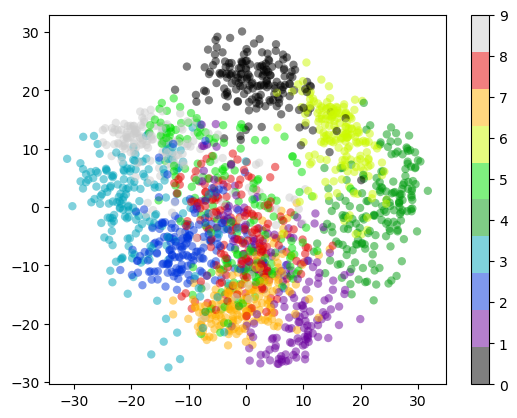

In [52]:
import matplotlib.pyplot as plt
plt.scatter(X_proj[:, 0], X_proj[:, 1], 
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

## Now working with mnist.pickle (5000 of 28*28 Images)

In [126]:
import gzip, pickle

DATA_PATH = 'data/mnist.pkl.gz'

#deserializing of mnist data set
with gzip.open(DATA_PATH, 'rb') as f:
    (X, y), _, _ = pickle.load(f, encoding='latin1')

print('Training data shape:    ', X.shape)
print('Training labels shape:  ', y.shape)

Training data shape:     (50000, 784)
Training labels shape:   (50000,)


## Using PCA as a data compressor and visually demonstrating the loss of data  

In [131]:
from ipywidgets import interact

def plot_digits(n_components, person_id):
    fig = plt.figure(figsize=(16, 8))
    
    pca = PCA(n_components).fit(X)

    for i in range (5000):
        if y[i] == dig:
            X_proj = pca.inverse_transform(pca.transform(X[i:i+1])) #projecting and re-projecting of Data to measure level of error
            X_proj = np.reshape(X_proj, ( 28, 28))
            total_var = pca.explained_variance_ratio_.sum()
            plt.subplot(121)                
            plt.imshow(X_proj, cmap='binary')
            plt.title("k = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
            plt.axis('off')
            plt.clim(0, 1)
    
            plt.subplot(122)
            X_org = X[i:i+1].reshape((28, 28))
            plt.imshow(X_org, cmap='binary')
            plt.title("Original Data", size=18)
            plt.axis('off')
            break
    

interact(plot_digits, n_components=[10, 20, 30, 40, 50, 100, 150, 200, 784], person_id=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]);

interactive(children=(Dropdown(description='n_components', options=(10, 20, 30, 40, 50, 100, 150, 200, 784), v…

## Now let's work with olivetti_faces dataset

In [132]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X, y = faces['data'], faces['target']
print(X.shape)

(400, 4096)


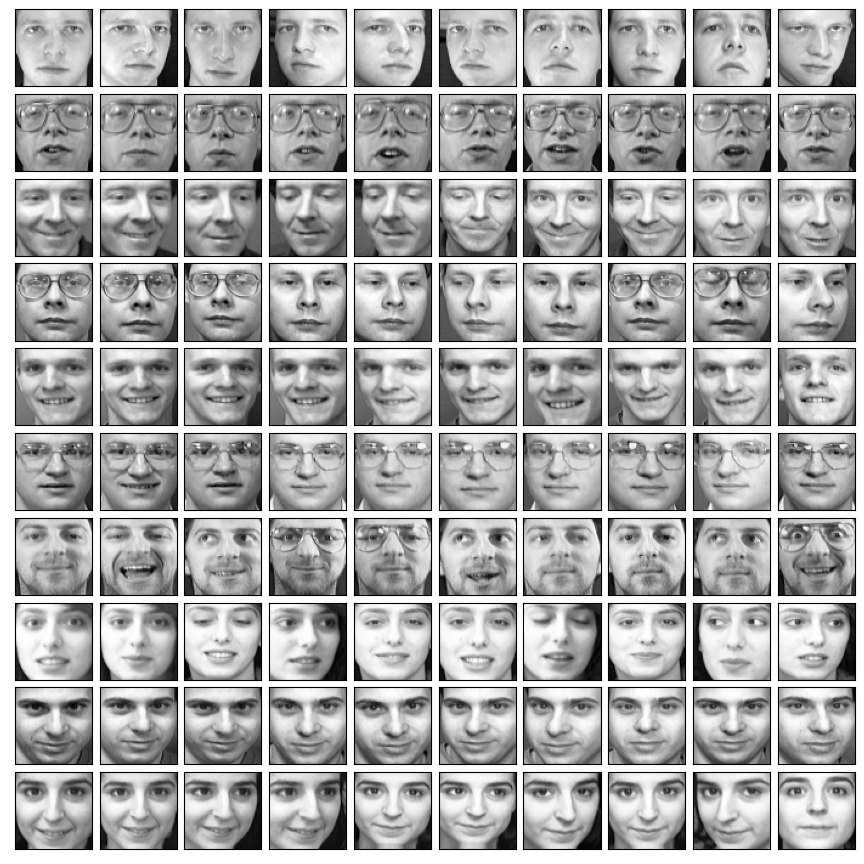

In [133]:
# select 100 faces randomly
X_samples = (X)[:100]

fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_samples[i].reshape((64, 64)), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [136]:
def plot_digits(n_components, person_id):
    fig = plt.figure(figsize=(16, 8))
    
    pca = PCA(n_components).fit(X)

    for i in range (400):
        if y[i] == person_id:
            X_proj = pca.inverse_transform(pca.transform(X[i:i+1])) #projecting and re-projecting of Data to measure level of error
            X_proj = np.reshape(X_proj, ( 64, 64))
            total_var = pca.explained_variance_ratio_.sum()
            plt.subplot(121)                
            plt.imshow(X_proj, cmap='binary')
            plt.title("k = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
            plt.axis('off')
            plt.clim(0, 1)
    
            plt.subplot(122)
            X_org = X[i:i+1].reshape((64, 64))
            plt.imshow(X_org, cmap='gray')
            plt.title("Original Data", size=18)
            plt.axis('off')
            break
    

interact(plot_digits, n_components=[100, 200, 300, 400, 1000, 1500, 2500, 3000, 4096], person_id=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);

interactive(children=(Dropdown(description='n_components', options=(100, 200, 300, 400, 1000, 1500, 2500, 3000…

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>